# Keras tutorial - Emotion Detection in Images of Faces

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


## 1 - Emotion Tracking


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## 2 - Building a model in Keras

In [4]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    """
    
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), name='max_pool')(X)

    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='HappyModel')
  
    return model

Training and testing the model:

1. Create the model by calling the function above  
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`  
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`  
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`  


#### Step 1: create the model.  


In [6]:
happyModel = HappyModel(X_train.shape[1:])


#### Step 2: compile the model

The "happiness detection" is a binary classification problem. Hence the loss function used is `'binary_cross_entropy'`.  Note that `'categorical_cross_entropy'` won't work with the data set as its formatted, because the data is an array of 0 or 1 rather than two arrays (one for each category).  

In [7]:
happyModel.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Step 3: train the model

In [8]:
happyModel.fit(X_train, Y_train, epochs=15, batch_size=16)

Epoch 1/15
600/600 [==============================] - 13s - loss: 0.8043 - acc: 0.7700    
Epoch 2/15
600/600 [==============================] - 13s - loss: 0.2171 - acc: 0.9033    
Epoch 3/15
600/600 [==============================] - 13s - loss: 0.1310 - acc: 0.9583    
Epoch 4/15
600/600 [==============================] - 13s - loss: 0.0899 - acc: 0.9650    
Epoch 5/15
600/600 [==============================] - 13s - loss: 0.1219 - acc: 0.9483    
Epoch 6/15
600/600 [==============================] - 13s - loss: 0.0781 - acc: 0.9750    
Epoch 7/15
600/600 [==============================] - 13s - loss: 0.0686 - acc: 0.9800    
Epoch 8/15
600/600 [==============================] - 13s - loss: 0.0618 - acc: 0.9850    
Epoch 9/15
600/600 [==============================] - 13s - loss: 0.1639 - acc: 0.9417    
Epoch 10/15
600/600 [==============================] - 13s - loss: 0.1573 - acc: 0.9433    
Epoch 11/15
600/600 [==============================] - 13s - loss: 0.0968 - acc: 0.9650  

#### Step 4: evaluate model  

In [10]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s     

Loss = 0.360583194892
Test Accuracy = 0.906666664282


In [11]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

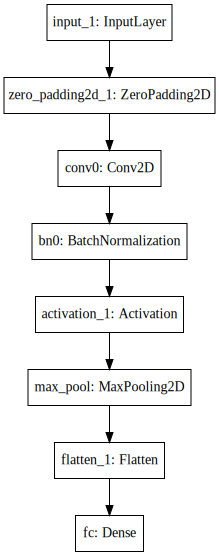

In [12]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))